

# Project: TMDb movie data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.
Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.
There are some odd characters in the ‘cast’ column. Don’t worry about cleaning them. You can leave them as is.
The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.
>
>  **Questions to answer**


>1-What kinds of properties are associated with movies that have high revenues?

>2-In which year the movies get most profit?

>3-How many films that produced evry year ?


In [2]:
#import statements for all of the packages that i
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, i will load in the data, check for cleanliness, and then trim and clean my dataset for analysis.

### General Properties

In [3]:
# Load the  data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

df = pd.read_csv('tmdb-movies.csv')
#printing some rows
df.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [5]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


budget can not be 0

In [6]:
"""Checking number of duplicates"""
df.duplicated().sum()

1



### Data Cleaning 

here Columnes like (revenue,budget,runtime) that have 0 will be replaced with nan-Values then will be dropped

In [9]:

df['revenue'].replace(0, np.NAN, inplace=True)
df['budget'].replace(0, np.NAN, inplace=True)
df['runtime'].replace(0, np.NAN, inplace=True)

df.dropna(axis=0, inplace=True)

Removing Unused columns

In [13]:
#deleting the columns
df= df.drop('imdb_id',1)
df= df.drop('homepage',1)
df= df.drop('director',1)
df= df.drop('tagline',1)
df= df.drop('overview',1)
df= df.drop('release_date',1)
df= df.drop('budget_adj',1)
df= df.drop('revenue_adj',1)
#previewing the new dataset
df.head(4)

,id,popularity,budget,revenue,original_title,cast,keywords,runtime,genres,production_companies,vote_count,vote_average,release_year
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,monster|dna|tyrannosaurus rex|velociraptor|island,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,future|chase|post-apocalyptic|dystopia|australia,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015
2,262500,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,based on novel|revolution|dystopia|sequel|dyst...,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015
3,140607,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,android|spaceship|jedi|space opera|3d,136.0,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015


removing the duplicate rows

In [14]:
df.drop_duplicates(keep ='first', inplace=True)


<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1 (What kinds of properties are associated with movies that have high revenues?!)

In [92]:
# Sort movies by revenue 
sorted_rev= df.sort_values(by=['revenue'], ascending = False)


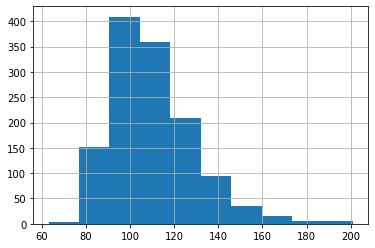

In [93]:
sorted_rev.runtime.hist()


the relationship between runtime and revenue

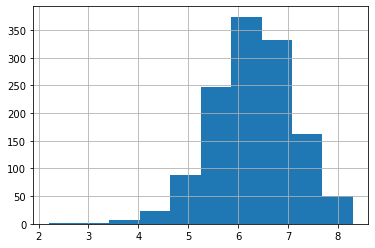

In [97]:
sorted_rev.vote_average.hist() 

the relationship between vote_average and revenue

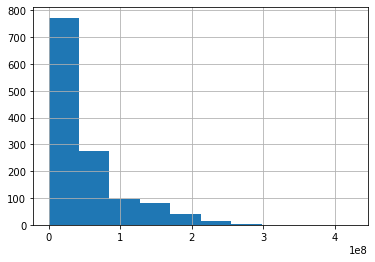

In [95]:
sorted_rev.budget.hist()

the relationship between budget and revenue

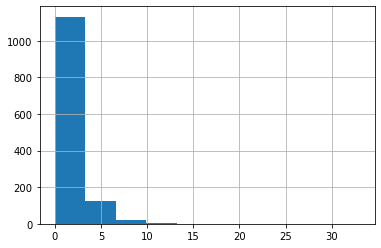

In [94]:
sorted_rev.popularity.hist()


the relationship between popularity and revenue

###  Question 2  (In which year the movies get most profit?)

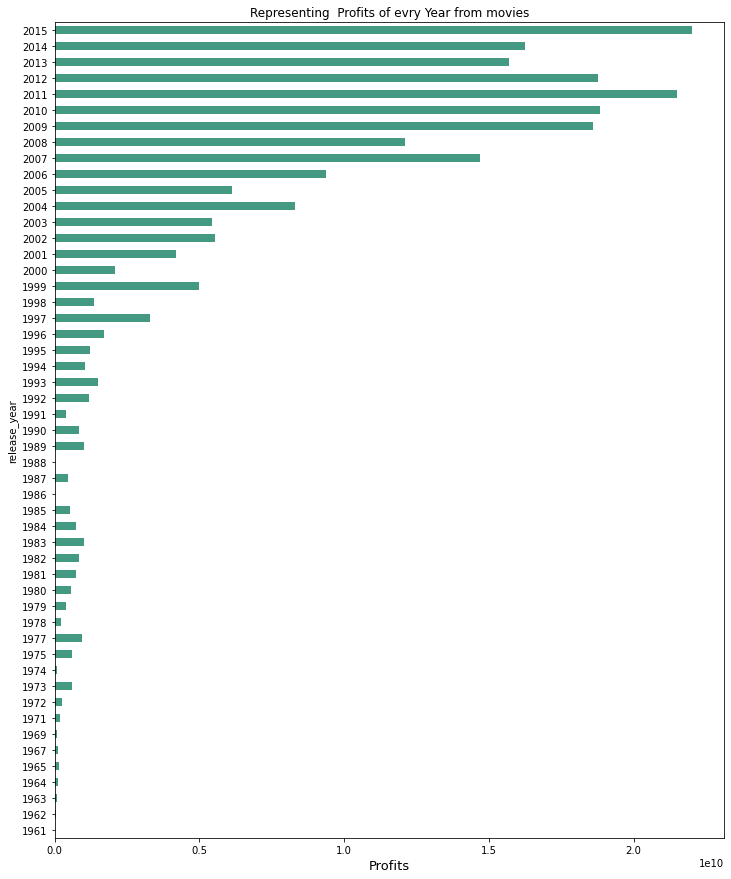

In [98]:
#profits of movies for every year in descending order.
profits_year = df.groupby('release_year')['revenue'].sum()

#ploting
lt = profits_year.plot.barh(color = '#439981', fontsize = 10)

#title
lt.set(title = 'Representing  Profits of evry Year from movies')

# on x axis
lt.set_xlabel('Profits', color = 'black', fontsize = '13')

#figure size(width, height)
lt.figure.set_size_inches(12, 15)

#ploting the graph.

###  Question 3 (How many films that produced evry year ?)

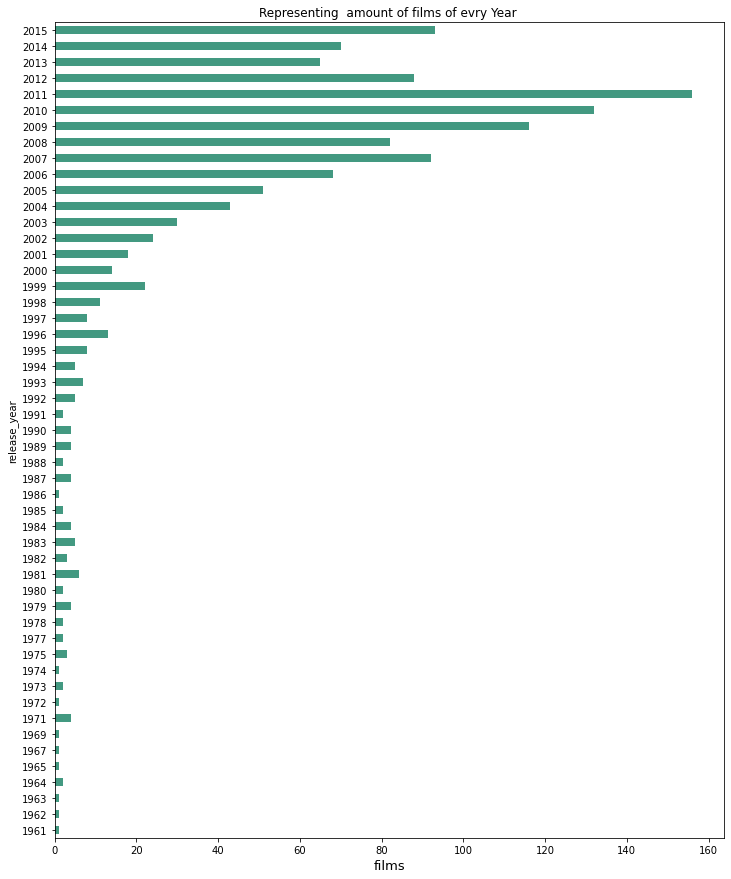

In [63]:
#profits of movies for every year in descending order.

films = df.groupby('release_year')['id'].size()


#ploting
lt = films.plot.barh(color = '#439981', fontsize = 10)

#title
lt.set(title = 'Representing  amount of films of evry Year ')

# on x axis
lt.set_xlabel('films', color = 'black', fontsize = '13')

#figure size(width, height)
lt.figure.set_size_inches(12, 15)

#ploting the graph.

<a id='conclusions'></a>
## Conclusions

In the first research question(What kinds of properties are associated with movies that have high revenues?) I wanted to know more about the properties  of most revenuable movies and  I found that the most revenuable movies is not that popular as it should but the films around 2 it is more revenuable, also the runtime between  90-120 min it is more revenuable, and films with vote average around 5.5 to 7 more revenuable, also the most revenuable movies is not with dig budget as it should.

The second research question (In which year the movies get most profit?) we can say that The profit increases with the passage of the years relatively but 2011 and 2015 saw the highest profit.

the third research question(How many films that produced evry year ?) In 2011 a lot of films were produced 
